# Analysis of Video and Image Data for cropping and texture features
Author(s): Miguel Xochicale @mxochicale    
Contributor(s): Sujon Hekim

## History
* 17th May 2023: Add prototype
* 10th Aug 2023: Adds saving dataframes in cvs files

## Summary


### How to run the notebook
1. Go to repository path: `$HOME/repositories/`
Open repo in pycharm and in the terminal type:
```
git checkout main # or the branch
git pull # to bring a local branch up-to-date with its remote version
```

2. Launch Notebook server. Go to you repository path: cd $HOME/repositories/ and type in the pycharm terminal:
```
mamba activate *VE 
jupyter notebook --browser=firefox
```
which will open your web-browser.

## References 
1. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe
2. https://github.com/YuxinZhaozyx/pytorch-VideoDataset/blob/master/datasets.py (Future work)
3. https://stackoverflow.com/questions/65446464/how-to-convert-a-video-in-numpy-array
4. https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py 
5. https://www.researchgate.net/publication/326881329_Medical_image_security_enhancement_using_two_dimensional_chaotic_mapping_optimized_by_self-adaptive_grey_wolf_algorithm 

    

## Setting imports and datasets paths

In [1]:
from rtt4ssa.utils.utils import video_to_tensor, compute_texture_array_and_plot
from rtt4ssa.utils.utils import data_frame_of_texture_analysis
from rtt4ssa.utils.utils import get_and_plot_imu_data_analysis

import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import skimage
from typing import Tuple, List

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/rtt4ssa'

###########################
###SET DATA_PATH 
DATA_PATH='repositories/datasets/in2research2023/Thu-27-Jul-2023' # DATA_PATH='scripts/sensor-fusion'
FULL_REPO_DATA_PATH = HOME_PATH +'/' + DATA_PATH

## Printing Versions and paths
print(FULL_REPO_DATA_PATH)
print(f'PyTorch Version: {torch.__version__}')
print(f'pandas Version: {pd.__version__}')
print(f'numpy Version: {np.__version__}')
print(f'cv2 Version: {cv2.__version__}')
print(f'skimage Version: {skimage.__version__}')



/home/mxochicale/repositories/datasets/in2research2023/Thu-27-Jul-2023
PyTorch Version: 2.0.0.post200
pandas Version: 2.0.3
numpy Version: 1.25.2
cv2 Version: 4.8.0
skimage Version: 0.21.0


# Reading video and plotting frames

In [2]:
PARTICIPANTNN_TESTNN = 'participant01-test05'

CSV_FILENAME_FOR_TEXTURE_ANALYSIS=PARTICIPANTNN_TESTNN+'.csv'
FULL_PATH_AND_AVI_FILE = os.path.join(FULL_REPO_DATA_PATH, 'participant01/'+PARTICIPANTNN_TESTNN+'.avi')
FULL_PATH_AND_CSV_FILE = os.path.join(FULL_REPO_DATA_PATH, 'participant01/'+PARTICIPANTNN_TESTNN+'.avi.csv')

start_frame_number = 000
end_frame_number = 4000
total_number_of_frames = end_frame_number - start_frame_number


video, frames_timestam = video_to_tensor(FULL_PATH_AND_AVI_FILE, start_frame_number, end_frame_number)

num_frames, height, width = video.shape
print(f'num_frames: {num_frames}')
print(f'height: {height}')
print(f'width: {width}')


  
  
  VIDEO_FEATURES
    video_name=/home/mxochicale/repositories/datasets/in2research2023/Thu-27-Jul-2023/participant01/participant01-test05.avi
    Frame_height=480, frame_width=640 fps=120 nframes=7265 
  
  
num_frames: 3999
height: 480
width: 640


# Generating texture_analysis_array and plotting frames and histograms

frame_i: 0, timestamp 00:00:0.000


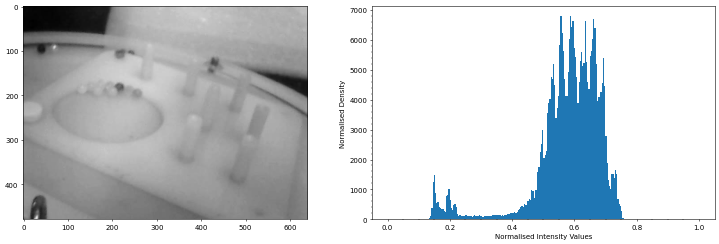

frame_i: 1000, timestamp 00:08:333.333


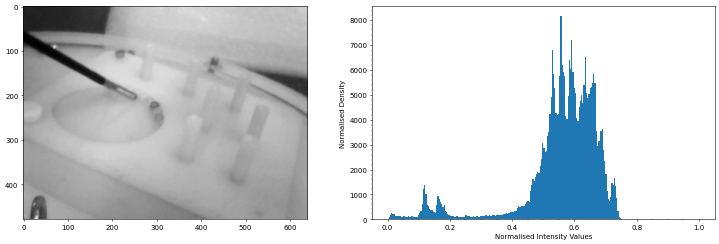

frame_i: 2000, timestamp 00:16:666.667


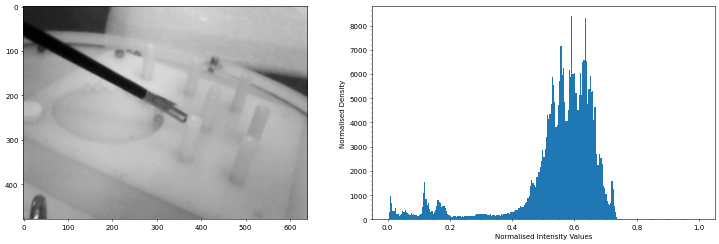

frame_i: 3000, timestamp 00:25:0.000


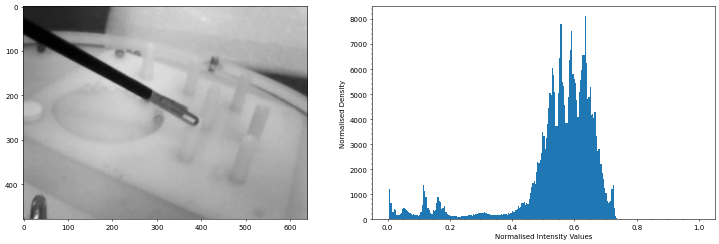

In [3]:
display_factor = 1000    
texture_analysis_array = compute_texture_array_and_plot(video, frames_timestam, display_factor)


# Getting texture analysis video frames (and saved cvs file)

In [4]:
df_texture_analysis = data_frame_of_texture_analysis(texture_analysis_array, start_frame_number, end_frame_number)

PLOTTING_DATA_PATH=HOME_PATH+'/'+DATA_PATH+'/plotting_data/'
os.makedirs(PLOTTING_DATA_PATH, exist_ok=True)  
df_texture_analysis.to_csv(PLOTTING_DATA_PATH+CSV_FILENAME_FOR_TEXTURE_ANALYSIS)  

print(df_texture_analysis)



      frame_i  Contrast  Correlation  Dissimilarity    Energy  Homogeneity  \
0           0  2.022209     0.998806       0.580008  0.082229     0.785652   
1           1  2.022209     0.998806       0.580008  0.082229     0.785652   
2           2  2.022209     0.998806       0.580008  0.082229     0.785652   
3           3  2.022209     0.998806       0.580008  0.082229     0.785652   
4           4  2.022209     0.998806       0.580008  0.082229     0.785652   
...       ...       ...          ...            ...       ...          ...   
3994     3994  4.036372     0.998460       0.749974  0.080883     0.762623   
3995     3995  4.036372     0.998460       0.749974  0.080883     0.762623   
3996     3996  4.036372     0.998460       0.749974  0.080883     0.762623   
3997     3997  4.036372     0.998460       0.749974  0.080883     0.762623   
3998     3998  4.036372     0.998460       0.749974  0.080883     0.762623   

           ASM  Contrast_normalised  Correlation_normalised  \


# Plotting texture analysis of all frames in the video

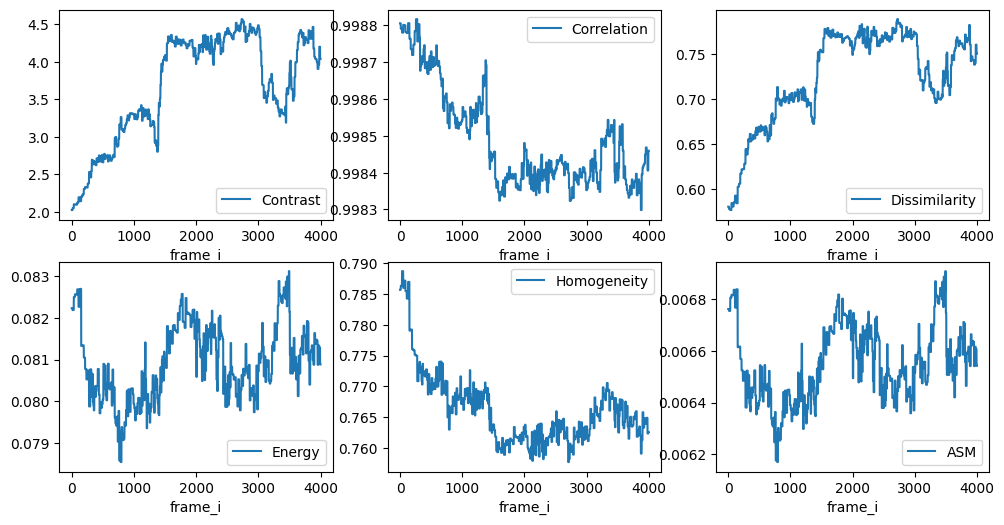

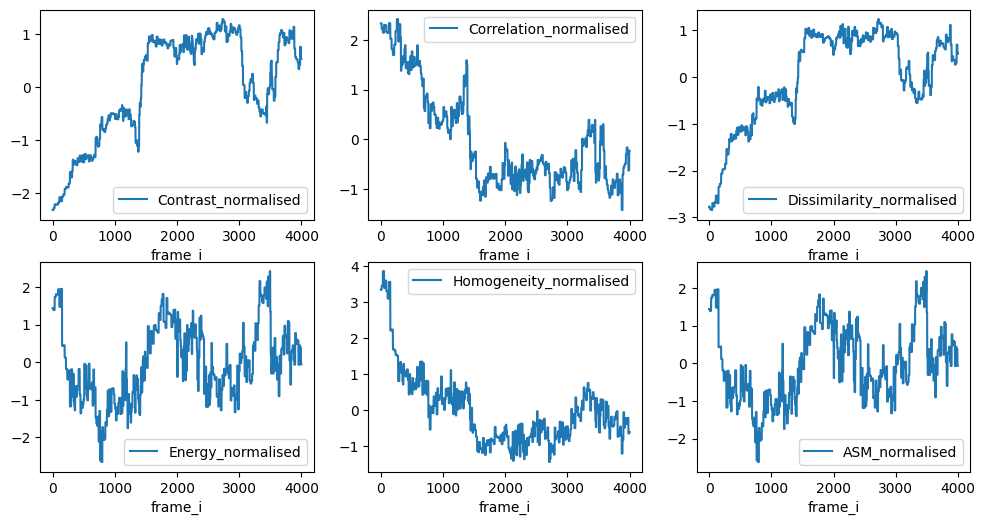

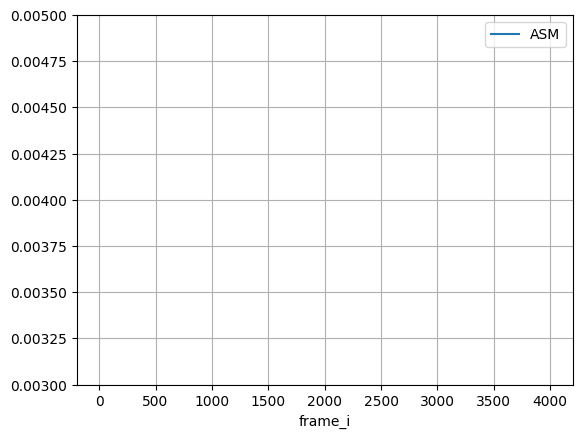

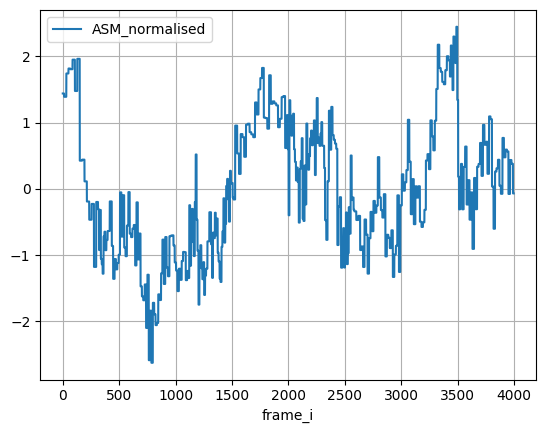

In [5]:
## Comment/uncomment any of the following lines to show however axis you would like to see in the plot
## TODO: https://seaborn.pydata.org/generated/seaborn.lineplot.html

### Ploting all texture features 
fig, axs = plt.subplots(2,3, figsize=(12, 6))

df_texture_analysis.plot(x='frame_i', y='Contrast', ax=axs[0,0] )
# axs[0,0].set_ylim((0,15)) 

df_texture_analysis.plot(x='frame_i', y='Correlation', ax=axs[0,1])
# # axs[0,2].set_ylim((0.997,0.999)) 

df_texture_analysis.plot(x='frame_i', y='Dissimilarity', ax=axs[0,2])
# axs[0,1].set_ylim((0.75,1.5)) 

df_texture_analysis.plot(x='frame_i', y='Energy', ax=axs[1,0])

df_texture_analysis.plot(x='frame_i', y='Homogeneity', ax=axs[1,1])
df_texture_analysis.plot(x='frame_i', y='ASM', ax=axs[1,2])

plt.show()



### Ploting all texture features 
fig, axs = plt.subplots(2,3, figsize=(12, 6))

df_texture_analysis.plot(x='frame_i', y='Contrast_normalised', ax=axs[0,0] )
# axs[0,0].set_ylim((0,15)) 

df_texture_analysis.plot(x='frame_i', y='Correlation_normalised', ax=axs[0,1])
# # axs[0,2].set_ylim((0.997,0.999)) 

df_texture_analysis.plot(x='frame_i', y='Dissimilarity_normalised', ax=axs[0,2])
# axs[0,1].set_ylim((0.75,1.5)) 

df_texture_analysis.plot(x='frame_i', y='Energy_normalised', ax=axs[1,0])

df_texture_analysis.plot(x='frame_i', y='Homogeneity_normalised', ax=axs[1,1])
df_texture_analysis.plot(x='frame_i', y='ASM_normalised', ax=axs[1,2])

plt.show()



### Ploting single texture feature
ax = plt.gca()
df_texture_analysis.plot(x='frame_i', y='ASM', ax=ax)
plt.ylim((0.003,0.005)) 
plt.grid()
plt.show()


ax = plt.gca()
df_texture_analysis.plot(x='frame_i', y='ASM_normalised', ax=ax)
plt.grid()
plt.show()



## Reading and ploting csv files

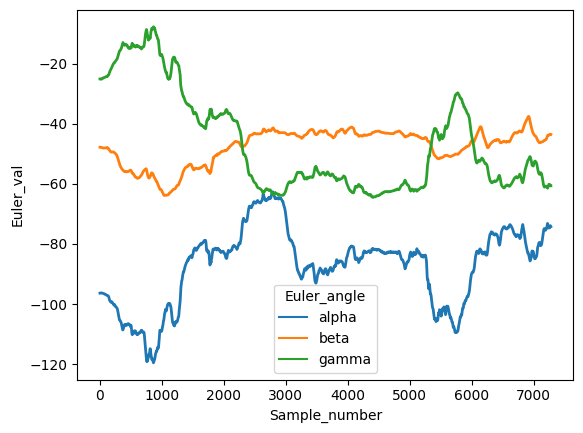

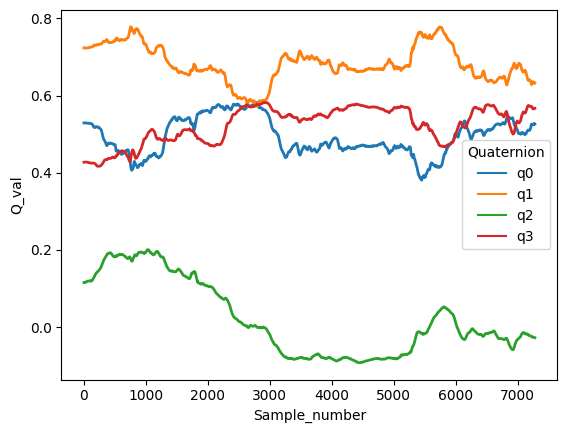

In [6]:
df, ndf, nqdf = get_and_plot_imu_data_analysis(FULL_PATH_AND_CSV_FILE)
    

In [7]:
ndf

,Sample_number,Euler_angle,Euler_val
0,0,alpha,-96.365417
1,1,alpha,-96.360344
2,2,alpha,-96.357536
3,3,alpha,-96.352646
4,4,alpha,-96.347961
...,...,...,...
21826,7272,gamma,-60.675373
21827,7273,gamma,-60.667568
21828,7274,gamma,-60.661713
21829,7275,gamma,-60.660122


In [8]:
nqdf

,Sample_number,Quaternion,Q_val
0,0,q0,0.529189
1,1,q0,0.529190
2,2,q0,0.529202
3,3,q0,0.529208
4,4,q0,0.529215
...,...,...,...
29103,7272,q3,0.567214
29104,7273,q3,0.567207
29105,7274,q3,0.567206
29106,7275,q3,0.567223


In [9]:
df

,Sample_number,epoch machine time (ns),Timestamp for frame capture.read (ns),Timestamp LPMSB2 (s),Quaternions_LPMSB2,Euler_LPMSB2,A,B,C,q0,q1,q2,q3
0,0,1690462308823751111,1690462308824070745,780.140,"[0.5291886329650879, 0.7237693667411804, 0.115...","[-96.36541748046875, -47.83282470703125, -25.1...",-96.365417,-47.832825,-25.128038,0.529189,0.723769,0.115633,0.427488
1,1,1690462308857045930,1690462308824070745,780.145,"[0.5291897654533386, 0.7237436175346375, 0.115...","[-96.36034393310547, -47.837303161621094, -25....",-96.360344,-47.837303,-25.132013,0.529190,0.723744,0.115653,0.427525
2,2,1690462308863557100,1690462308824070745,780.150,"[0.5292022824287415, 0.7237030863761902, 0.115...","[-96.35753631591797, -47.84941482543945, -25.1...",-96.357536,-47.849415,-25.121729,0.529202,0.723703,0.115798,0.427539
3,3,1690462308870402987,1690462308824070745,780.155,"[0.5292078852653503, 0.7236779928207397, 0.115...","[-96.35264587402344, -47.85331344604492, -25.1...",-96.352646,-47.853313,-25.124752,0.529208,0.723678,0.115819,0.427569
4,4,1690462308876784101,1690462308824070745,780.160,"[0.5292152166366577, 0.7236531972885132, 0.115...","[-96.34796142578125, -47.85715866088867, -25.1...",-96.347961,-47.857159,-25.127005,0.529215,0.723653,0.115845,0.427595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,7272,1690462373480201011,1690462373409781096,816.500,"[0.5271919369697571, 0.6321479678153992, -0.02...","[-74.04244232177734, -43.52931594848633, -60.6...",-74.042442,-43.529316,-60.675373,0.527192,0.632148,-0.026936,0.567214
7273,7273,1690462373490317692,1690462373409781096,816.505,"[0.526872992515564, 0.6324149966239929, -0.027...","[-74.09522247314453, -43.543453216552734, -60....",-74.095222,-43.543453,-60.667568,0.526873,0.632415,-0.027061,0.567207
7274,7274,1690462373499085067,1690462373409781096,816.510,"[0.5265794396400452, 0.6326550841331482, -0.02...","[-74.14276123046875, -43.55625534057617, -60.6...",-74.142761,-43.556255,-60.661713,0.526579,0.632655,-0.027180,0.567206
7275,7275,1690462373508174206,1690462373510770281,816.515,"[0.5263253450393677, 0.6328467726707458, -0.02...","[-74.18043518066406, -43.5677375793457, -60.66...",-74.180435,-43.567738,-60.660122,0.526325,0.632847,-0.027283,0.567223
